In [9]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)

In [10]:
all_AVA_muts = pd.read_pickle("../data/ava/4_10_with_uniq_midpts.pkl")
display(len(all_AVA_muts), all_AVA_muts.head())

5676

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,imodulons,imodulon links,EC numbers,EC number links,products,product links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
0,9,42C,1,124,1,1,1.0,702352,DEL,Δ21 bp,coding (380‑400/1149 nt),nagA,NaN,1 124 1 1,True,"(702352, 702372)",{ECK120000625},"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",False,False,{},{},{},{},{},True,"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",{'ECK120000625': ['ECK120000625']},"[{'name': 'nagBAC-umpH', 'RegulonDB ID': 'ECK1...",{'ECK125162049': ['ECK120000625']},"[{'name': 'PhoP', 'significantly associated co...","{'NagC': ['ECK125162049'], 'PhoP': ['ECK125162...","[{'name': 'Galactose metabolism', 'significant...","{'Galactose metabolism': ['ECK125162049'], 'Am...",[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,"[{'name': 'NagC/TyrR', 'significantly associat...",{'NagC/TyrR': ['nagBAC-umpH']},"[{'name': '3.5.1.25', 'significantly associate...","{'3.5.1.25': ['ECK125162049', 'ECK125162049']}",[{'name': 'N-acetylglucosamine-6-phosphate dea...,{'N-acetylglucosamine-6-phosphate deacetylase ...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1,10,42C,1,124,1,1,1.0,1308318,SNP,G→C,R110G (CGT→GGT),clsA,NaN,1 124 1 1,True,"(1308318, 1308318)",{ECK120001556},"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",False,False,{},{},{},{},{},True,"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",{'ECK120001556': ['ECK120001556']},"[{'name': 'clsA-yciU', 'RegulonDB ID': 'ECK125...",{'ECK125147415': ['ECK120001556']},[],{},[],{},[{'name': 'Lipid transport and metabolism'}],{'Lipid transport and metabolism': ['ECK125147...,[],{},[],{},[],{},42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2,11,42C,1,124,1,1,1.0,3815859,DEL,Δ82 bp,None,rph,NaN,1 124 1 1,True,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",False,False,{},{},{},{ECK125144791},{},True,"[{'name': 'rph-pyrE attenuator terminator', 'R...","{'ECK120000854': ['ECK120000854'], 'ECK1200007...","[{'name': 'rph-pyrE', 'RegulonDB ID': 'ECK1200...","{'ECK120014627': ['ECK120000854', 'ECK12000079...",[],{},"[{'name': 'Pyrimidine metabolism', 'significan...","{'Pyrimidine metabolism': ['ECK120014627'], 'D...",[{'name': 'Nucleotide transport and metabolism'}],{'Nucleotide transport and metabolism': ['ECK1...,"[{'name': 'purR-KO', 'significantly associated...","{'purR-KO': ['rph-pyrE', 'rph-pyrE']}","[{'name': '2.4.2.10', 'significantly associate...","{'2.4.2.10': ['ECK120014627', 'ECK120014627']}",[{'name': 'Orotate phosphoribosyltransferase (...,{'Orotate phosphoribosyltransferase (EC 2.4.2....,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
3,12,42C,1,124,1,1,1.0,4187550,SNP,C→T,A734V (GCG→GTG),rpoC,NaN,1 124 1 1,True,"(4187550, 4187550)",{ECK120000886},"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",False,False,{},{},{},{},{},True,"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",{'ECK120000886': ['ECK120000886']},"[{'name': 'rplKAJL-rpoBC', 'RegulonDB ID': 'EC...",{'ECK120016992': ['ECK120000886']},[],{},"[{'name': 'Purine metabolism', 'significantly ...","{'Purine metabolism': ['ECK120016992'], 'Pyrim...",[{'name': 'Transcription'}],{'Transcription': ['ECK120016992']},"[{'name': 'translation', 'significantly associ...",{'translation': ['rplKAJL-rpoBC']},"[{'name': '2.7.7.6'

In [11]:
FEAT_TYPE_COL = {
    'genomic features',
    'operons',
    'regulators',
    'pathways',
#     'imodulons',
#     'EC numbers',
}

FEAT_TYPES = {
    'RBS',
    'TFBS',
    'attenuator terminator',
    'gene',
    'promoter',
    'terminator',
    'intergenic',
    'operons',
    'regulators',
    'pathways',
#     'imodulons',
#     'EC numbers',
}

In [12]:
feat_type_feats_conds_d = {ft:dict() for ft in FEAT_TYPES}
for _, m in all_AVA_muts.iterrows():
    for c in FEAT_TYPE_COL:
        for f in m[c]:
            ft = c
            if c == "genomic features":
                ft = f["feature type"]
                if ft == "unknown":
                    ft = "intergenic"
            f_id = f["name"]
            if ((c == "genomic features") | (c == "operons")):
                f_id = f["RegulonDB ID"]
            if f_id not in feat_type_feats_conds_d[ft].keys():
                feat_type_feats_conds_d[ft][f_id] = set()
            feat_type_feats_conds_d[ft][f_id] |= f['significantly associated conditions']

In [13]:
feat_type_feats_conds_df = pd.DataFrame()
for ft, f_conds_d in feat_type_feats_conds_d.items():
    for f, conds in f_conds_d.items():
        feat_type_feats_conds_df = feat_type_feats_conds_df.append(
            {"feature":f, "feature type":ft,  "significantly associated condition count":len(conds)}, ignore_index=True
        )
feat_type_feats_conds_df

,feature,feature type,significantly associated condition count
0,ECK125162049,operons,11.0
1,ECK125147415,operons,0.0
2,ECK120014627,operons,32.0
3,ECK120016992,operons,23.0
4,ECK125147410,operons,3.0
...,...,...,...
4896,Tetracycline biosynthesis,pathways,1.0
4897,Diterpenoid biosynthesis,pathways,0.0
4898,Biosynthesis of type II polyketide backbone,pathways,0.0
4899,Biosynthesis of unsaturated fatty acids,pathways,0.0


In [14]:
feat_type_feats_conds_df["feature type"] = feat_type_feats_conds_df.apply(lambda r: r["feature type"].replace("regulators", "regulons") , axis=1)
# feat_type_feats_conds_df["feature type"] = feat_type_feats_conds_df.apply(lambda r: r["feature type"].replace("EC numbers", "reactions") , axis=1)
feat_type_feats_conds_df["feature type"] = feat_type_feats_conds_df.apply(lambda r: r["feature type"][:-1] if r["feature type"][-1] == 's' else r["feature type"] ,axis=1)

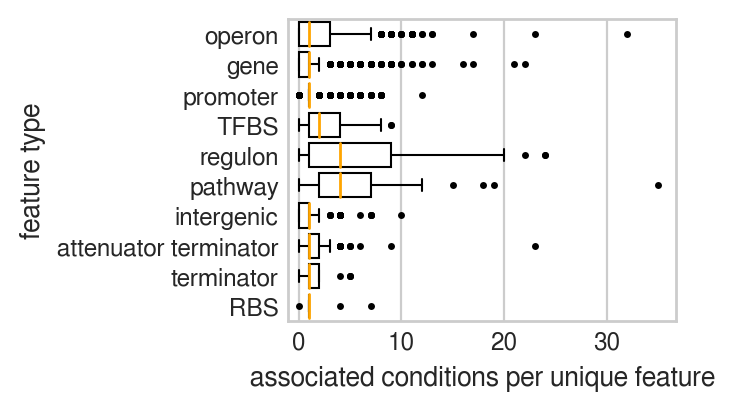

In [15]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
sns.set_palette("muted")
sns.set_context("paper")
# sns.set_style("ticks")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

boxplot_kwargs = {
    'boxprops': {'color': 'w', 'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'orange', 'linewidth': 1},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': '.', 'markerfacecolor': "black", 'markeredgecolor': "None"}
}

plt.figure(figsize=(2.5, 2))
ax = sns.boxplot(
    data=feat_type_feats_conds_df, x="significantly associated condition count", y="feature type",
    order=["operon", "gene", "promoter", "TFBS", "regulon", "pathway", "intergenic", "attenuator terminator", "terminator", "RBS"],
    **boxplot_kwargs
)

ax.set_xlabel("associated conditions per unique feature")
ax.tick_params(axis='both', which='both', length=0)
ax.set_xlim(-1,)
plt.savefig("fy.svg")

### Inspect by condition categories

In [16]:
COND_CATS = {
    'temperature',
    'supplement',
    'strain-description',
    'taxonomy-id',
    'base-media',
    'carbon-source',
    'nitrogen-source',
    'phosphorous-source',
    'sulfur-source',
    'calcium-source'
}

In [17]:
COND_TO_COND_TYPE_d = dict()
for cc in COND_CATS:
    for cond in all_AVA_muts[cc].unique():
        COND_TO_COND_TYPE_d[cond] = cc

In [18]:
CC_FT_assoc_d = dict()
for cc in COND_CATS:
    d = {ft:set() for ft in FEAT_TYPES}
    CC_FT_assoc_d[cc] = d
# CC_FT_assoc_d

for _, m in all_AVA_muts.iterrows():
    for ftc in FEAT_TYPE_COL:
        for f in m[ftc]:
            for cond in f['significantly associated conditions']:
                cc = COND_TO_COND_TYPE_d[cond]
                ft = ftc
                f_id = f['name']
                if ftc == "genomic features":
                    f_id = f['RegulonDB ID']
                    ft = f["feature type"]
                    if ft == "unknown":
                        ft = "intergenic"
                if ftc == "operons":
                    f_id = f['RegulonDB ID']
                    
                CC_FT_assoc_d[cc][ft].add(f_id)
                
# CC_FT_assoc_d

In [19]:
C_FT_F_assoc_d = dict()
for c in COND_TO_COND_TYPE_d.keys():
    d = {ft:set() for ft in FEAT_TYPES}
    C_FT_F_assoc_d[c] = d
    

for _, m in all_AVA_muts.iterrows():
    for ftc in FEAT_TYPE_COL:
        for f in m[ftc]:
            for c in f['significantly associated conditions']:
                ft = ftc
                f_id = f['name']
                if ftc == "genomic features":
                    f_id = f['RegulonDB ID']
                    ft = f["feature type"]
                    if ft == "unknown":
                        ft = "intergenic"
                if ftc == "operons":
                    f_id = f['RegulonDB ID']
                    
                C_FT_F_assoc_d[c][ft].add(f_id)
                
# C_FT_F_assoc_d

In [20]:
df = pd.DataFrame()
for c, ft_f_assoc_d in C_FT_F_assoc_d.items():
    for ft, feats in ft_f_assoc_d.items():
        if c not in df.index:
            srs = pd.Series({ft:0 for ft in FEAT_TYPES}, name=c)
            df = df.append(srs)
        df.at[c,ft] += len(feats)
df["associated features"] = df.apply(lambda r: r[FEAT_TYPES].sum(), axis=1)
df = df[df["associated features"]!=0]
df["condition type"] = df.apply(lambda r: COND_TO_COND_TYPE_d[r.name], axis=1)
df.head()

,RBS,TFBS,attenuator terminator,gene,intergenic,operons,pathways,promoter,regulators,terminator,associated features,condition type
CaCl2(0.1),0.0,17.0,1.0,13.0,0.0,40.0,8.0,0.0,32.0,0.0,111.0,calcium-source
LB,1.0,52.0,12.0,211.0,13.0,181.0,42.0,57.0,25.0,6.0,600.0,nitrogen-source
none,0.0,3.0,3.0,16.0,1.0,19.0,2.0,8.0,10.0,1.0,63.0,calcium-source
CaCl2(0.1mM),1.0,0.0,1.0,56.0,4.0,59.0,17.0,12.0,25.0,0.0,175.0,calcium-source
NaCl(0.5g/L) trace elements,1.0,21.0,1.0,40.0,5.0,69.0,15.0,8.0,33.0,0.0,193.0,supplement


In [42]:
# getting medians to sort upcoming boxplot
medians_d = {}
for c_t, tdf in df.groupby(["condition type"]):
    medians_d[c_t] = tdf["associated features"].median()
medians_df = pd.DataFrame.from_dict(medians_d, orient="index", columns=["median"])
medians_df = medians_df.sort_values(by="median", ascending=False)
medians_df

,median
temperature,233.0
base-media,161.0
calcium-source,111.0
phosphorous-source,87.5
sulfur-source,87.5
carbon-source,69.0
supplement,68.0
strain-description,55.0
nitrogen-source,48.0


(0.0, 629.95)

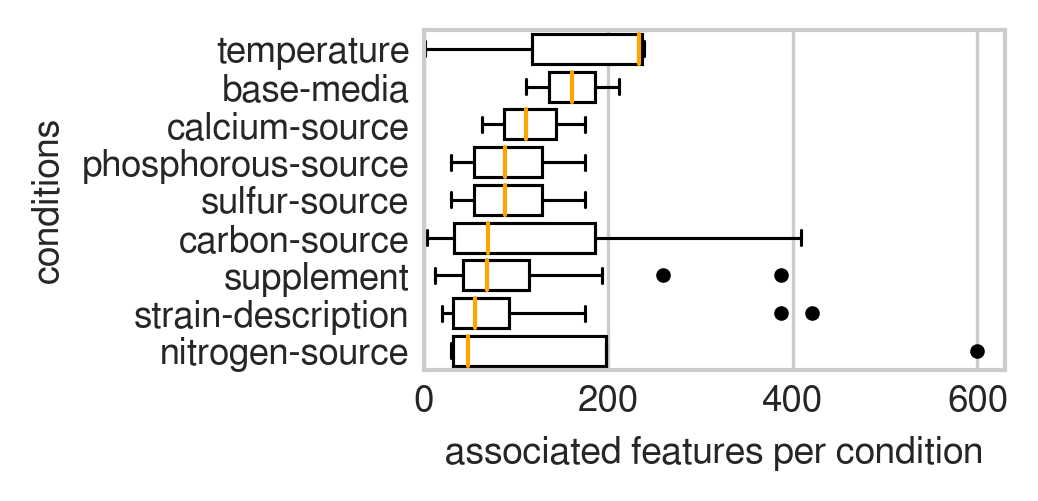

In [43]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_palette("muted")
sns.set_context("paper")
# sns.set_style("ticks")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'orange', 'linewidth': 1},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': '.', 'markerfacecolor': "black", 'markeredgecolor': "black",
#                    "markersize": 2  # only include if including the stripplot
                  }
}

plt.figure(
    figsize=(2.5, 1.5)
)
ax = sns.boxplot(
    data=df, x="associated features", y="condition type",
    order=medians_df.index,
    color="white",
    **boxplot_kwargs
)

ax.set_xlabel('associated features per condition', fontname="FreeSans", fontsize=9)
ax.set_ylabel('conditions', fontname="FreeSans", fontsize=9)
ax.tick_params(axis='both', which='both', length=0)
ax.set_xlim(0,)

In [14]:
df2 = pd.DataFrame()
for c, r in df.iterrows():
    for ftc in FEAT_TYPES:

        srs = pd.Series({"condition type": r["condition type"],
                         "feature type": ftc, "associated count": r[ftc]}, name=c)
        df2 = df2.append(srs)
df2["associated count"] = df2["associated count"].astype(int)
df2

,associated count,condition type,feature type
42 celsius,87,temperature,gene
42 celsius,19,temperature,promoter
42 celsius,15,temperature,regulators
42 celsius,0,temperature,RBS
42 celsius,2,temperature,terminator
...,...,...,...
(NH4)2SO4(1) MgSO4,1,sulfur-source,intergenic
(NH4)2SO4(1) MgSO4,0,sulfur-source,attenuator terminator
(NH4)2SO4(1) MgSO4,8,sulfur-source,operons
(NH4)2SO4(1) MgSO4,2,sulfur-source,pathways


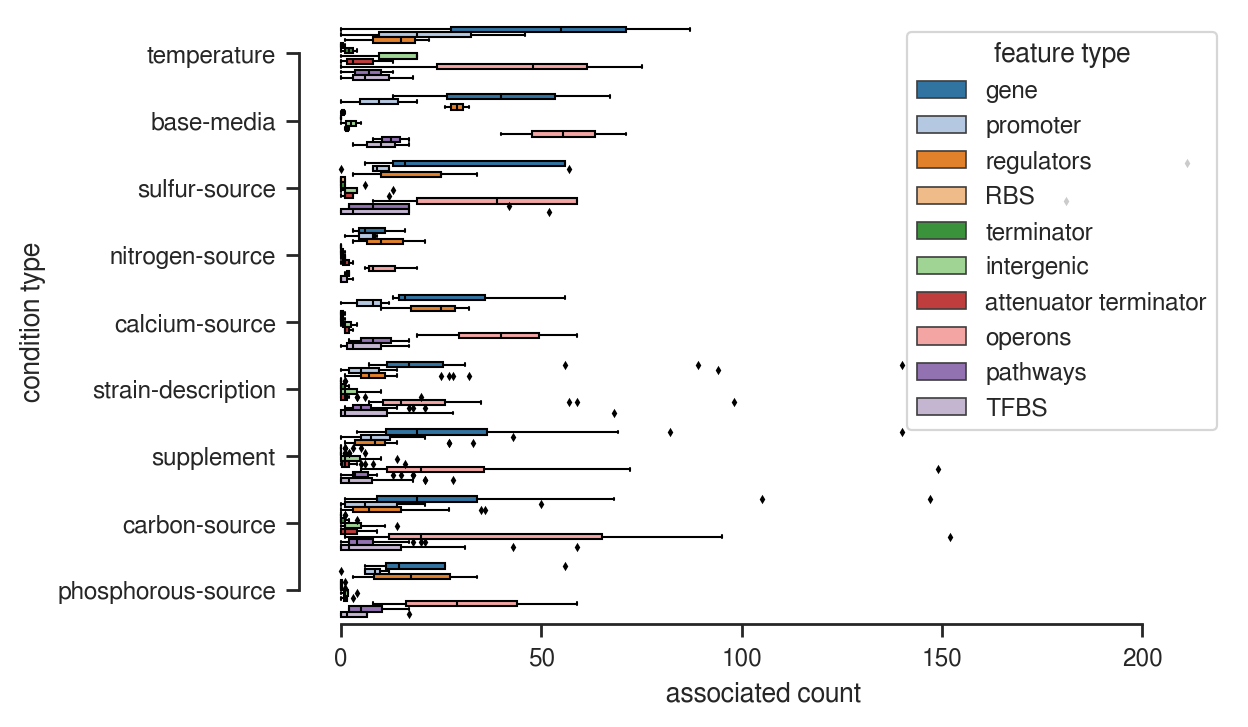

In [15]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
sns.set_palette("tab20")
sns.set_context("paper")
sns.set_style("ticks")
# sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'black', 'linewidth': 0.75},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': 'd', 'markerfacecolor': "black", 'markeredgecolor': "black", "markersize":1}
}

plt.figure(
#     figsize=(3, 2)
)
sns.boxplot(
    data=df2, x="associated count", y="condition type",
    hue="feature type",
#             color="white",
            **boxplot_kwargs
           )
# sns.stripplot(
#     data=df, x="genomic features", y="cond type",
#               color="0.8",
#               alpha=0.5, 
#               linewidth=1,
# #               facecolors=None
#              )

sns.despine(
    #     offset=10,
    trim=True
)

In [16]:
CC_FT_assoc_cnt_df = pd.DataFrame(columns=["condition type", "feature type", "associated count"])
for cc, ft_d in CC_FT_assoc_d.items():
    for ft, f_set in ft_d.items():
        CC_FT_assoc_cnt_df = CC_FT_assoc_cnt_df.append({"condition type": cc,
                                                        "feature type": ft,
                                                        "associated count": len(f_set)
                                                       }, ignore_index=True)
CC_FT_assoc_cnt_df = CC_FT_assoc_cnt_df[CC_FT_assoc_cnt_df["associated count"] != 0]
CC_FT_assoc_cnt_df.head()

,condition type,feature type,associated count
0,temperature,gene,141
1,temperature,promoter,64
2,temperature,regulators,35
3,temperature,RBS,1
4,temperature,terminator,6


In [17]:
CC_FT_assoc_cnt_df["feature type"] = CC_FT_assoc_cnt_df.apply(lambda r: r["feature type"].replace("regulators", "regulons") , axis=1)
# CC_FT_assoc_cnt_df["feature type"] = CC_FT_assoc_cnt_df.apply(lambda r: r["feature type"].replace("EC numbers", "reactions") , axis=1)
CC_FT_assoc_cnt_df["feature type"] = CC_FT_assoc_cnt_df.apply(lambda r: r["feature type"][:-1] if r["feature type"][-1] == 's' else r["feature type"] ,axis=1)

In [18]:
p = {
    'gene':"#72C4B3",
    'operon':"#A7A0CB",
    'pathway':"#F65E54",
    'imodulon':"#6397C2",
    'regulon':"#FA9A47",
    'attenuator terminator':"#9BD44C",
    'intergenic':"#F9B8DA",
    'promoter':"#CAC9CA",
    'terminator':"#A35DA6",
    'TFBS':"#BAE4B0",
    'RBS':"#FFE953",
    'reaction': "#F781BF",
    'product': "#D9AF77"
}

/home/pphaneuf/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pphaneuf/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


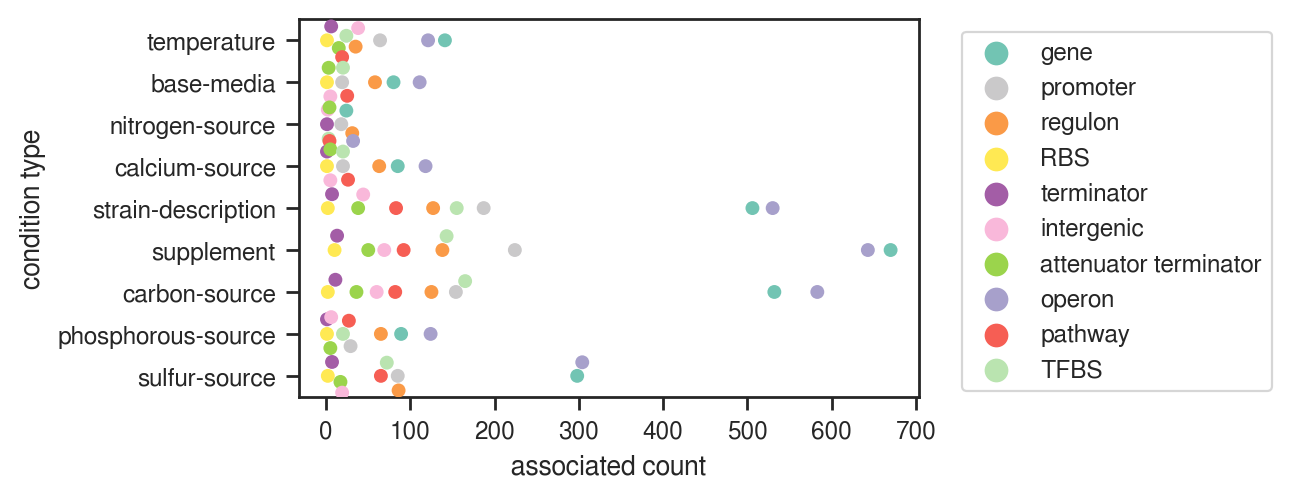

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("ticks")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


plt.figure(figsize=(4, 2.5))
ax = sns.swarmplot(x="associated count", y="condition type", hue="feature type", data=CC_FT_assoc_cnt_df, palette=p)
plt.legend(
#     title='title',
    bbox_to_anchor=(1.05, 1), loc='upper left',
#     prop=fontP
)

In [20]:
CC_FT_assoc_cnt_df.head()

,condition type,feature type,associated count
0,temperature,gene,141
1,temperature,promoter,64
2,temperature,regulon,35
3,temperature,RBS,1
4,temperature,terminator,6


In [21]:
# TODO: order columns according to which have the largest sums on average per CC
CC_FT_assoc_cnt_mat = pd.DataFrame(columns=CC_FT_assoc_cnt_df["feature type"].unique(), index=CC_FT_assoc_cnt_df["condition type"].unique())
CC_FT_assoc_cnt_mat = CC_FT_assoc_cnt_mat.fillna(0)

for _, r in CC_FT_assoc_cnt_df.iterrows():
    CC_FT_assoc_cnt_mat.at[r["condition type"], r["feature type"]] = r["associated count"]

CC_FT_assoc_cnt_mat

,gene,promoter,regulon,RBS,terminator,intergenic,attenuator terminator,operon,pathway,TFBS
temperature,141,64,35,1,6,38,15,121,19,24
base-media,80,19,58,1,0,5,3,111,25,20
nitrogen-source,24,18,31,0,1,2,4,32,4,3
calcium-source,85,20,63,1,1,5,5,118,26,20
strain-description,506,187,127,2,7,44,38,530,83,155
supplement,670,224,138,10,13,69,50,643,92,143
carbon-source,532,154,125,2,11,60,36,583,82,165
phosphorous-source,89,29,65,1,1,6,5,124,27,20
sulfur-source,298,85,86,2,7,19,17,304,65,72


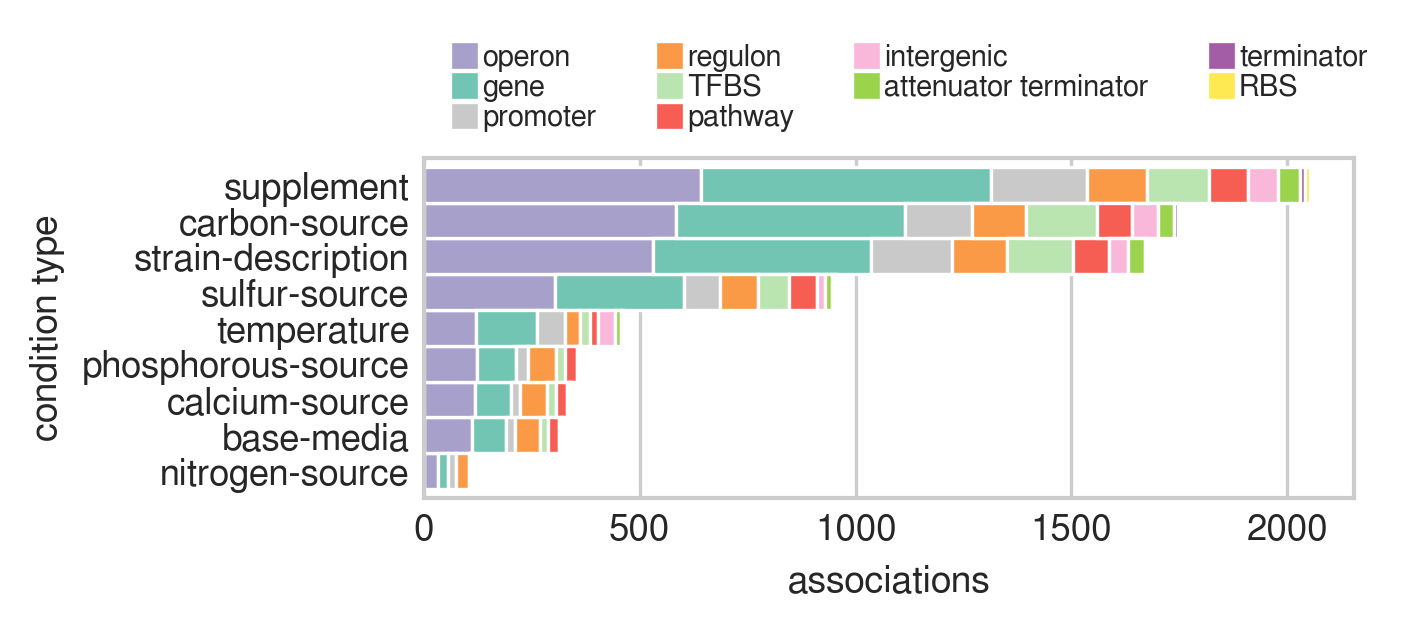

In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_palette("Set2")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1


df = CC_FT_assoc_cnt_mat.copy()

# sorting
df["sum"] = df.apply(lambda r: r.sum(), axis=1)
df.sort_values(by="sum", inplace=True)
df.drop(columns=["sum"], inplace=True)
df = df.T
df["sum"] = df.apply(lambda r: r.sum(), axis=1)
df.sort_values(by="sum", ascending=False, inplace=True)
df.drop(columns=["sum"], inplace=True)
df = df.T
# display(df)

ax = df.plot.barh(
    figsize=(4, 1.5),
    width=1,
    color=p,
    stacked=True
)

# sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)
# leg = ax.legend(
#     loc='center left',
#     bbox_to_anchor=(1, 0.4),
#     frameon=False,
#     title="feature type",
#     labelspacing=0
# )

leg = ax.legend(
    bbox_to_anchor=(0., 1, 1., .102),
    loc=3,
    ncol=4,
    frameon=False,
    fontsize=7,
    labelspacing=0
)

leg._legend_box.align = "left"
ax.tick_params(axis='both', which='both', length=0)

ax.set_xlabel('associations', fontname="FreeSans", fontsize=9)  # TODO: call out in figure description that the assocations are statistically significant.
ax.set_ylabel('condition type', fontname="FreeSans", fontsize=9)
ax.grid(axis='y')
# ax.set_title("Mutations to the GlpK subunit binding sites\nare very specific")

,nitrogen-source,base-media,calcium-source,phosphorous-source,temperature,sulfur-source,strain-description,carbon-source,supplement
RBS,0,1,1,1,1,2,2,2,10
terminator,1,0,1,1,6,7,7,11,13
attenuator terminator,4,3,5,5,15,17,38,36,50
intergenic,2,5,5,6,38,19,44,60,69
pathway,4,25,26,27,19,65,83,82,92
TFBS,3,20,20,20,24,72,155,165,143
regulon,31,58,63,65,35,86,127,125,138
promoter,18,19,20,29,64,85,187,154,224
gene,24,80,85,89,141,298,506,532,670
operon,32,111,118,124,121,304,530,583,643


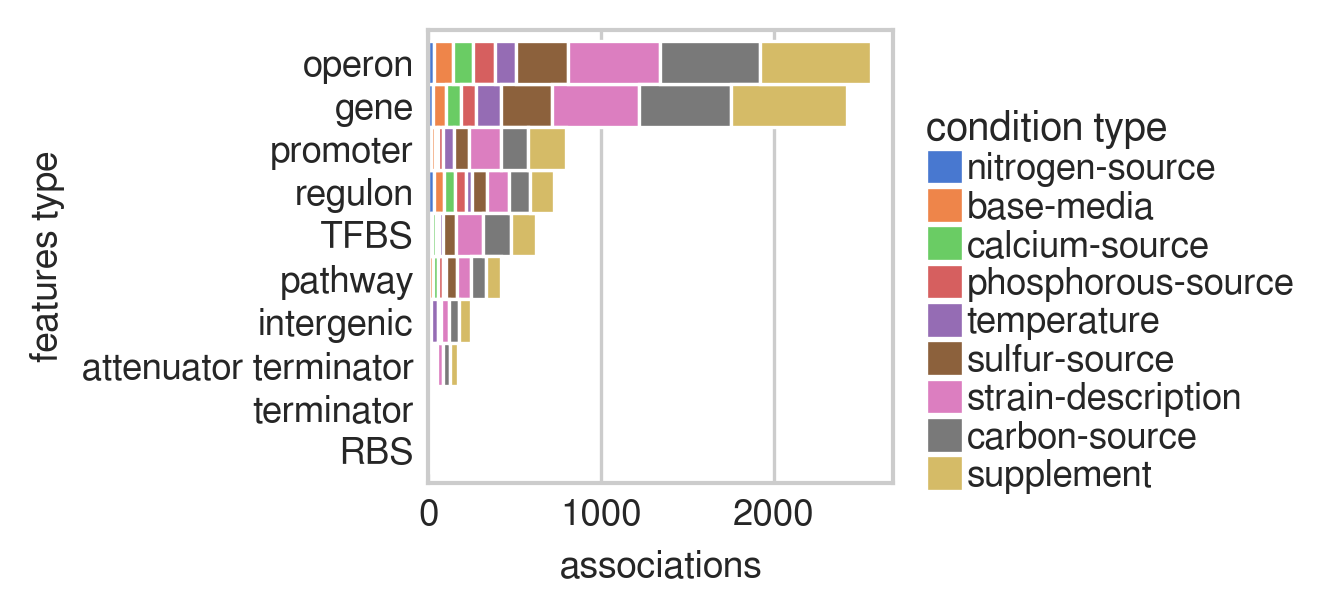

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_palette("muted")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1


df = CC_FT_assoc_cnt_mat.copy()

# sorting
df["sum"] = df.apply(lambda r: r.sum(), axis=1)
df.sort_values(by="sum", inplace=True)
df.drop(columns=["sum"], inplace=True)
df = df.T
df["sum"] = df.apply(lambda r: r.sum(), axis=1)
df.sort_values(by="sum", ascending=True, inplace=True)
df.drop(columns=["sum"], inplace=True)
display(df)

ax = df.plot.barh(
    figsize=(2, 2),
    width=1,
#     color=p,
    stacked=True
)

# sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.4), frameon=False, title="condition type", labelspacing=0)
leg._legend_box.align = "left"
ax.tick_params(axis='both', which='both', length=0)

for tick in ax.get_xticklabels():
    tick.set_fontname("FreeSans")
for tick in ax.get_yticklabels():
    tick.set_fontname("FreeSans")

ax.set_xlabel('associations', fontname="FreeSans", fontsize=9)
ax.set_ylabel('features type', fontname="FreeSans", fontsize=9)
ax.grid(axis='y')
# ax.set_title("Mutations to the GlpK subunit binding sites\nare very specific")
plt.savefig("fx.svg")